## Setup

In [1]:
topology = 'B'
omission = 'omitIntMet'
ablation = 25

In [2]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

import pandas as pd
import numpy as np
np.random.seed(SEED)
import tellurium as te

import random

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.multivariate.manova import MANOVA

import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import os

import gzip
import cloudpickle

In [3]:
os.chdir('..')
from src import antemll, util
os.chdir('notebooks')

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
ant ='../models/Antimony/topologyB-noReg.ant' 
r = te.loada(ant)
r.conservedMoietyAnalysis = True
r.steadyState()
gtEla = r.getScaledElasticityMatrix().ravel()

In [5]:
pt_labels = ['0.5x', '1.5x', '3x', '5x']

In [6]:
enzymes = ['e_' + i for i in r.getReactionIds()]
internal = r.getFloatingSpeciesIds()
external = r.getBoundarySpeciesIds()
fluxes = ['v_' + i for i in r.getReactionIds()]

In [39]:
data05 = pd.read_csv(f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.5.csv')[fluxes+external+enzymes]
data15 = pd.read_csv(f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_1.5.csv')[fluxes+external+enzymes]
data3 = pd.read_csv(f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_3.csv')[fluxes+external+enzymes]
data5 = pd.read_csv(f'../data/interim/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_5.csv')[fluxes+external+enzymes]


In [40]:
BMCA_obj05 = antemll.antemll(ant, data05, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15 = antemll.antemll(ant, data15, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3 = antemll.antemll(ant, data3, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5 = antemll.antemll(ant, data5, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


## Downloading all the trace files and establishing elasticity means

In [9]:
picklefolder = '../data/results/tracePickles/'

# no ablat, only omit IntMet
with gzip.open(picklefolder + f'topologyB-noReg_traces-sd2.pgz', "rb") as f:
    traces = cloudpickle.load(f, encoding='bytes')

trace05=traces['trace05']
trace15=traces['trace15']
trace3=traces['trace3']
trace5=traces['trace5']

Ex05_ab0 = util.get_az_summary(trace05)
Ex15_ab0 = util.get_az_summary(trace15)
Ex3_ab0 = util.get_az_summary(trace3)
Ex5_ab0 = util.get_az_summary(trace5)

ela_ab0_values = np.column_stack([Ex05_ab0, Ex15_ab0, Ex3_ab0, Ex5_ab0])

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


In [10]:
ablation = 25 
with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-1.pgz', "rb") as f:
    traces_1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-2.pgz', "rb") as f:
    traces_2 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-3.pgz', "rb") as f:
    traces_3 = cloudpickle.load(f, encoding='bytes')

trace05_1=traces_1['trace05']
trace15_1=traces_1['trace15']
trace3_1=traces_1['trace3']
trace5_1=traces_1['trace5']

trace05_2=traces_2['trace05']
trace15_2=traces_2['trace15']
trace3_2=traces_2['trace3']
trace5_2=traces_2['trace5']

trace05_3=traces_3['trace05']
trace15_3=traces_3['trace15']
trace3_3=traces_3['trace3']
trace5_3=traces_3['trace5']

Ex05_ab25 = util.get_az_mean([trace05_1, trace05_2, trace05_3])
Ex15_ab25 = util.get_az_mean([trace15_1, trace15_2, trace15_3])
Ex3_ab25 = util.get_az_mean([trace3_1, trace3_2, trace3_3])
Ex5_ab25 = util.get_az_mean([trace5_1, trace5_2, trace5_3])

ela_ab25_values = np.column_stack([Ex05_ab25, Ex15_ab25, Ex3_ab25, Ex5_ab25])

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [11]:
ablation = 50
with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-1.pgz', "rb") as f:
    traces_1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-2.pgz', "rb") as f:
    traces_2 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-noReg_{omission}_fluxAblat{ablation}_traces-3.pgz', "rb") as f:
    traces_3 = cloudpickle.load(f, encoding='bytes')


trace05_1=traces_1['trace05']
trace15_1=traces_1['trace15']
trace3_1=traces_1['trace3']
trace5_1=traces_1['trace5']

trace05_2=traces_2['trace05']
trace15_2=traces_2['trace15']
trace3_2=traces_2['trace3']
trace5_2=traces_2['trace5']

trace05_3=traces_3['trace05']
trace15_3=traces_3['trace15']
trace3_3=traces_3['trace3']
trace5_3=traces_3['trace5']

Ex05_ab50 = util.get_az_mean([trace05_1, trace05_2, trace05_3])
Ex15_ab50 = util.get_az_mean([trace15_1, trace15_2, trace15_3])
Ex3_ab50 = util.get_az_mean([trace3_1, trace3_2, trace3_3])
Ex5_ab50 = util.get_az_mean([trace5_1, trace5_2, trace5_3])

ela_ab50_values = np.column_stack([Ex05_ab50, Ex15_ab50, Ex3_ab50, Ex5_ab50])

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [13]:
# free

## organizing elasticity values into pd dfs 

In [12]:
pt_labels = ['0.5x', '1.5x', '3x', '5x']

ela_ab0_df = pd.DataFrame(ela_ab0_values, columns=pt_labels)
ela_ab25_df = pd.DataFrame(ela_ab25_values, columns=pt_labels)
ela_ab50_df = pd.DataFrame(ela_ab50_values, columns=pt_labels)

ela_ab0_df['median'] = ela_ab0_df.median(axis=1)
ela_ab0_df['min'] = ela_ab0_df.min(axis=1)
ela_ab0_df['max'] = ela_ab0_df.max(axis=1)

ela_ab25_df['median'] = ela_ab25_df.median(axis=1)
ela_ab25_df['min'] = ela_ab25_df.min(axis=1)
ela_ab25_df['max'] = ela_ab25_df.max(axis=1)

ela_ab50_df['median'] = ela_ab50_df.median(axis=1)
ela_ab50_df['min'] = ela_ab50_df.min(axis=1)
ela_ab50_df['max'] = ela_ab50_df.max(axis=1)

## graphing the elasticity predictions over perturbation level and regulator level

In [13]:
lower_y_ab0 = np.array(ela_ab0_df['median']) - ela_ab0_df['min'].values
upper_y_ab0 =np.array(ela_ab0_df['max'].values) - np.array(ela_ab0_df['median'])
errors_ab0 = [lower_y_ab0, upper_y_ab0]

lower_y_ab25 = np.array(ela_ab25_df['median']) - ela_ab25_df['min'].values
upper_y_ab25 =np.array(ela_ab25_df['max'].values) - np.array(ela_ab25_df['median'])
errors_ab25 = [lower_y_ab25, upper_y_ab25]

lower_y_ab50 = np.array(ela_ab50_df['median']) - ela_ab50_df['min'].values
upper_y_ab50 =np.array(ela_ab50_df['max'].values) - np.array(ela_ab50_df['median'])
errors_ab50 = [lower_y_ab50, upper_y_ab50]


In [14]:
# MAE
print(round(sum(abs(ela_ab0_df['median']-gtEla))/len(gtEla),5))
print(round(sum(abs(ela_ab25_df['median']-gtEla))/len(gtEla),5))
print(round(sum(abs(ela_ab50_df['median']-gtEla))/len(gtEla),5))

0.07324
0.25183
0.25282


Text(0, 0.5, 'predicted elasticity values')

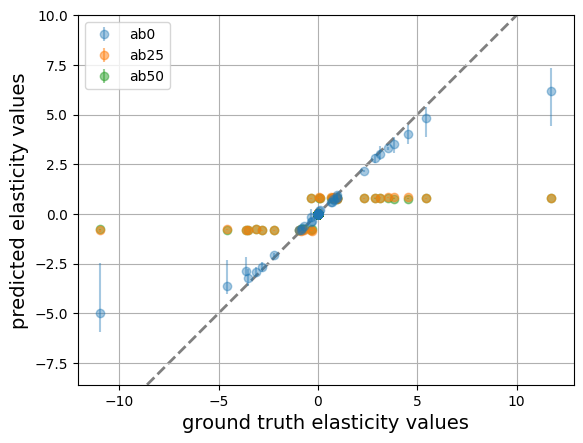

In [15]:
plt.axes().set_aspect('equal', 'datalim')

#plt.xlim((-5,5))
#plt.ylim((-4,4))

plt.errorbar(gtEla, ela_ab0_df['median'], yerr=errors_ab0, alpha=0.4, fmt='o', label='ab0', zorder=100)
plt.errorbar(gtEla, ela_ab25_df['median'], yerr=errors_ab25, alpha=0.5, fmt='o', label='ab25', zorder=50)
plt.errorbar(gtEla, ela_ab50_df['median'], yerr=errors_ab50, alpha=0.5, fmt='o', label='ab50', zorder=20)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('predicted elasticity values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities.svg', format="svg")

### graphing the elasticity errors

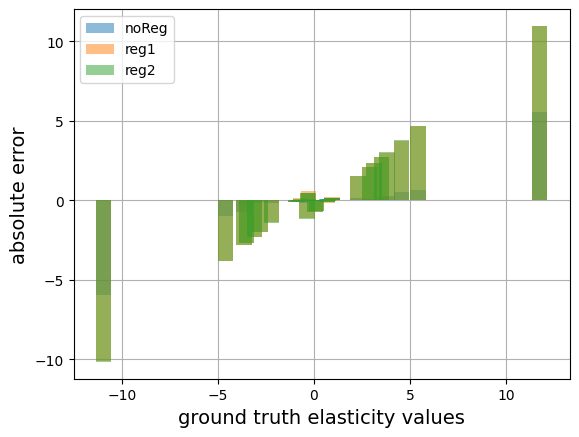

In [16]:
plt.grid()

plt.bar(gtEla,gtEla-ela_ab0_df['median'], alpha=0.5, label='noReg', zorder=200)
plt.bar(gtEla,gtEla-ela_ab25_df['median'], alpha=0.5, label='reg1', zorder=200)
plt.bar(gtEla,gtEla-ela_ab50_df['median'], alpha=0.5, label='reg2', zorder=200)

plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('absolute error', size=14)

plt.legend(loc="upper left")

## Calculating control coefficients

In [17]:
Ex05_prior_ab0= util.get_az_summary(util.run_prior_predictive(BMCA_obj05)['prior']['Ex'])
Ex15_prior_ab0= util.get_az_summary(util.run_prior_predictive(BMCA_obj15)['prior']['Ex'])
Ex3_prior_ab0= util.get_az_summary(util.run_prior_predictive(BMCA_obj3)['prior']['Ex'])
Ex5_prior_ab0= util.get_az_summary(util.run_prior_predictive(BMCA_obj5)['prior']['Ex'])

Ex05_prior_ab25= util.get_az_summary(util.run_prior_predictive(BMCA_obj05)['prior']['Ex'])
Ex15_prior_ab25= util.get_az_summary(util.run_prior_predictive(BMCA_obj15)['prior']['Ex'])
Ex3_prior_ab25= util.get_az_summary(util.run_prior_predictive(BMCA_obj3)['prior']['Ex'])
Ex5_prior_ab25= util.get_az_summary(util.run_prior_predictive(BMCA_obj5)['prior']['Ex'])

Ex05_prior_ab50= util.get_az_summary(util.run_prior_predictive(BMCA_obj05)['prior']['Ex'])
Ex15_prior_ab50= util.get_az_summary(util.run_prior_predictive(BMCA_obj15)['prior']['Ex'])
Ex3_prior_ab50= util.get_az_summary(util.run_prior_predictive(BMCA_obj3)['prior']['Ex'])
Ex5_prior_ab50= util.get_az_summary(util.run_prior_predictive(BMCA_obj5)['prior']['Ex'])


Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries

## Calculating CCC values and making graphs

In [18]:
gtCCC = pd.DataFrame(r.getScaledConcentrationControlCoefficientMatrix(), index=r.getFloatingSpeciesIds(), columns=r.getReactionIds())

### priors

In [19]:
priorCCC05_ab0 = util.estimate_CCCs(BMCA_obj05, Ex05_prior_ab0.reshape((19,-1)))
priorCCC15_ab0 = util.estimate_CCCs(BMCA_obj15, Ex15_prior_ab0.reshape((19,-1)))
priorCCC3_ab0 = util.estimate_CCCs(BMCA_obj3, Ex3_prior_ab0.reshape((19,-1)))
priorCCC5_ab0 = util.estimate_CCCs(BMCA_obj5, Ex5_prior_ab0.reshape((19,-1)))

priorCCC05_ab25 = util.estimate_CCCs(BMCA_obj05, Ex05_prior_ab25.reshape((19,-1)))
priorCCC15_ab25 = util.estimate_CCCs(BMCA_obj15, Ex15_prior_ab25.reshape((19,-1)))
priorCCC3_ab25 = util.estimate_CCCs(BMCA_obj3, Ex3_prior_ab25.reshape((19,-1)))
priorCCC5_ab25 = util.estimate_CCCs(BMCA_obj5, Ex5_prior_ab25.reshape((19,-1)))

priorCCC05_ab50 = util.estimate_CCCs(BMCA_obj05, Ex05_prior_ab50.reshape((19,-1)))
priorCCC15_ab50 = util.estimate_CCCs(BMCA_obj15, Ex15_prior_ab50.reshape((19,-1)))
priorCCC3_ab50 = util.estimate_CCCs(BMCA_obj3, Ex3_prior_ab50.reshape((19,-1)))
priorCCC5_ab50 = util.estimate_CCCs(BMCA_obj5, Ex5_prior_ab50.reshape((19,-1)))

In [20]:
priorCCCs_ab0 = [priorCCC05_ab0, priorCCC15_ab0, priorCCC3_ab0, priorCCC5_ab0]
priorCCCs_ab25 = [priorCCC05_ab25, priorCCC15_ab25, priorCCC3_ab25, priorCCC5_ab25]
priorCCCs_ab50 = [priorCCC05_ab50, priorCCC15_ab50, priorCCC3_ab50, priorCCC5_ab50]

In [22]:
priorCCC_ab0_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=r.getReactionIds(), index=r.getFloatingSpeciesIds()) for priorCCC in priorCCCs_ab0]
priorCCC_ab0_meds = pd.concat([i.melt()['value'] for i in priorCCC_ab0_meds], axis=1).values
priorCCC_ab0_meds = pd.DataFrame(priorCCC_ab0_meds, columns=pt_labels)
priorCCC_ab0_meds['median'] = priorCCC_ab0_meds.median(axis=1)
priorCCC_ab0_meds['min'] = priorCCC_ab0_meds.min(axis=1)
priorCCC_ab0_meds['max'] = priorCCC_ab0_meds.max(axis=1)
# priorCCC_ab0_meds

In [23]:
priorCCC_ab25_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=r.getReactionIds(), index=r.getFloatingSpeciesIds()) for priorCCC in priorCCCs_ab25]
priorCCC_ab25_meds = pd.concat([i.melt()['value'] for i in priorCCC_ab25_meds], axis=1).values
priorCCC_ab25_meds = pd.DataFrame(priorCCC_ab25_meds, columns=pt_labels)
priorCCC_ab25_meds['median'] = priorCCC_ab25_meds.median(axis=1)
priorCCC_ab25_meds['min'] = priorCCC_ab25_meds.min(axis=1)
priorCCC_ab25_meds['max'] = priorCCC_ab25_meds.max(axis=1)
# priorCCC_ab25_meds

In [24]:
priorCCC_ab50_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=r.getReactionIds(), index=r.getFloatingSpeciesIds()) for priorCCC in priorCCCs_ab50]
priorCCC_ab50_meds = pd.concat([i.melt()['value'] for i in priorCCC_ab50_meds], axis=1).values
priorCCC_ab50_meds = pd.DataFrame(priorCCC_ab50_meds, columns=pt_labels)
priorCCC_ab50_meds['median'] = priorCCC_ab50_meds.median(axis=1)
priorCCC_ab50_meds['min'] = priorCCC_ab50_meds.min(axis=1)
priorCCC_ab50_meds['max'] = priorCCC_ab50_meds.max(axis=1)
# priorCCC_ab50_meds

In [25]:
CCC_lower_y_ab0_prior = np.array(priorCCC_ab0_meds['median']) - np.array(priorCCC_ab0_meds['min'])
CCC_upper_y_ab0_prior = np.array(priorCCC_ab0_meds['max']) - np.array(priorCCC_ab0_meds['median'])
CCC_errors_ab0_prior = [CCC_lower_y_ab0_prior, CCC_upper_y_ab0_prior]

CCC_lower_y_ab25_prior = np.array(priorCCC_ab25_meds['median']) - np.array(priorCCC_ab25_meds['min'])
CCC_upper_y_ab25_prior = np.array(priorCCC_ab25_meds['max']) - np.array(priorCCC_ab25_meds['median'])
CCC_errors_ab25_prior = [CCC_lower_y_ab25_prior, CCC_upper_y_ab25_prior]

CCC_lower_y_ab50_prior = np.array(priorCCC_ab50_meds['median']) - np.array(priorCCC_ab50_meds['min'])
CCC_upper_y_ab50_prior = np.array(priorCCC_ab50_meds['max']) - np.array(priorCCC_ab50_meds['median'])
CCC_errors_ab50_prior = [CCC_lower_y_ab50_prior, CCC_upper_y_ab50_prior]

### posteriors

In [26]:
# all data
postCCC05_ab0 = util.estimate_CCCs(BMCA_obj05, Ex05_ab0.reshape((19,-1)))
postCCC15_ab0 = util.estimate_CCCs(BMCA_obj15, Ex15_ab0.reshape((19,-1)))
postCCC3_ab0 = util.estimate_CCCs(BMCA_obj3, Ex3_ab0.reshape((19,-1)))
postCCC5_ab0 = util.estimate_CCCs(BMCA_obj5, Ex5_ab0.reshape((19,-1)))

postCCC05_ab25 = util.estimate_CCCs(BMCA_obj05, Ex05_ab25.reshape((19,-1)))
postCCC15_ab25 = util.estimate_CCCs(BMCA_obj15, Ex15_ab25.reshape((19,-1)))
postCCC3_ab25 = util.estimate_CCCs(BMCA_obj3, Ex3_ab25.reshape((19,-1)))
postCCC5_ab25 = util.estimate_CCCs(BMCA_obj5, Ex5_ab25.reshape((19,-1)))

postCCC05_ab50 = util.estimate_CCCs(BMCA_obj05, Ex05_ab50.reshape((19,-1)))
postCCC15_ab50 = util.estimate_CCCs(BMCA_obj15, Ex15_ab50.reshape((19,-1)))
postCCC3_ab50 = util.estimate_CCCs(BMCA_obj3, Ex3_ab50.reshape((19,-1)))
postCCC5_ab50 = util.estimate_CCCs(BMCA_obj5, Ex5_ab50.reshape((19,-1)))

In [27]:
postCCCs_ab0 = [postCCC05_ab0, postCCC15_ab0, postCCC3_ab0, postCCC5_ab0]
postCCCs_ab25 = [postCCC05_ab25, postCCC15_ab25, postCCC3_ab25, postCCC5_ab25]
postCCCs_ab50 = [postCCC05_ab50, postCCC15_ab50, postCCC3_ab50, postCCC5_ab50]

In [28]:
postCCC_ab0_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=r.getReactionIds(), index=r.getFloatingSpeciesIds()) for postCCC in postCCCs_ab0]
postCCC_ab0_meds = pd.concat([i.melt()['value'] for i in postCCC_ab0_meds], axis=1).values
postCCC_ab0_meds = pd.DataFrame(postCCC_ab0_meds, columns=pt_labels)
postCCC_ab0_meds['median'] = postCCC_ab0_meds.median(axis=1)
postCCC_ab0_meds['min'] = postCCC_ab0_meds.min(axis=1)
postCCC_ab0_meds['max'] = postCCC_ab0_meds.max(axis=1)

postCCC_ab25_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=r.getReactionIds(), index=r.getFloatingSpeciesIds()) for postCCC in postCCCs_ab25]
postCCC_ab25_meds = pd.concat([i.melt()['value'] for i in postCCC_ab25_meds], axis=1).values
postCCC_ab25_meds = pd.DataFrame(postCCC_ab25_meds, columns=pt_labels)
postCCC_ab25_meds['median'] = postCCC_ab25_meds.median(axis=1)
postCCC_ab25_meds['min'] = postCCC_ab25_meds.min(axis=1)
postCCC_ab25_meds['max'] = postCCC_ab25_meds.max(axis=1)

postCCC_ab50_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=r.getReactionIds(), index=r.getFloatingSpeciesIds()) for postCCC in postCCCs_ab50]
postCCC_ab50_meds = pd.concat([i.melt()['value'] for i in postCCC_ab50_meds], axis=1).values
postCCC_ab50_meds = pd.DataFrame(postCCC_ab50_meds, columns=pt_labels)
postCCC_ab50_meds['median'] = postCCC_ab50_meds.median(axis=1)
postCCC_ab50_meds['min'] = postCCC_ab50_meds.min(axis=1)
postCCC_ab50_meds['max'] = postCCC_ab50_meds.max(axis=1)

In [29]:
CCC_lower_y_ab0_post = np.array(postCCC_ab0_meds['median']) - np.array(postCCC_ab0_meds['min'])
CCC_upper_y_ab0_post = np.array(postCCC_ab0_meds['max']) - np.array(postCCC_ab0_meds['median'])
CCC_errors_ab0_post = [CCC_lower_y_ab0_post, CCC_upper_y_ab0_post]

CCC_lower_y_ab25_post = np.array(postCCC_ab25_meds['median']) - np.array(postCCC_ab25_meds['min'])
CCC_upper_y_ab25_post = np.array(postCCC_ab25_meds['max']) - np.array(postCCC_ab25_meds['median'])
CCC_errors_ab25_post = [CCC_lower_y_ab25_post, CCC_upper_y_ab25_post]

CCC_lower_y_ab50_post = np.array(postCCC_ab50_meds['median']) - np.array(postCCC_ab50_meds['min'])
CCC_upper_y_ab50_post = np.array(postCCC_ab50_meds['max']) - np.array(postCCC_ab50_meds['median'])
CCC_errors_ab50_post = [CCC_lower_y_ab50_post, CCC_upper_y_ab50_post]

### graphs

Text(0, 0.5, 'predicted CCC values')

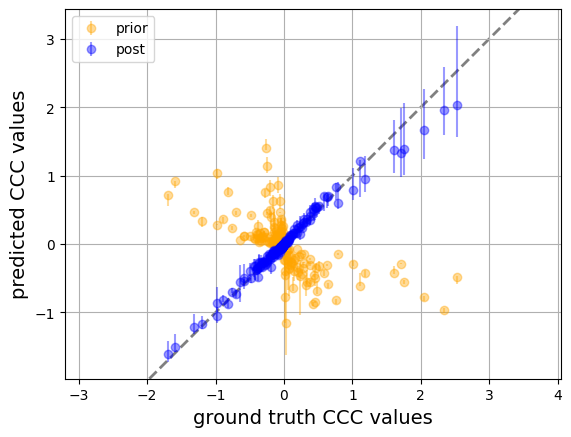

In [30]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC.melt()['value'], priorCCC_ab0_meds['median'], yerr=CCC_errors_ab0_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC.melt()['value'], postCCC_ab0_meds['median'], yerr=CCC_errors_ab0_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=14)
plt.ylabel('predicted CCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_1.svg', format="svg")

Text(0, 0.5, 'predicted CCC values')

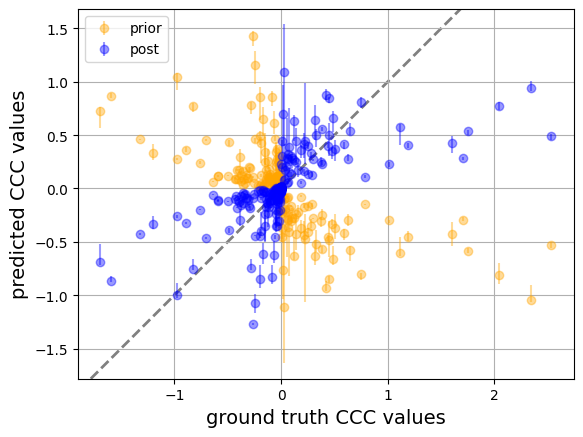

In [31]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC.melt()['value'], priorCCC_ab25_meds['median'], yerr=CCC_errors_ab25_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC.melt()['value'], postCCC_ab25_meds['median'], yerr=CCC_errors_ab25_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=14)
plt.ylabel('predicted CCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_1.svg', format="svg")

Text(0, 0.5, 'predicted CCC values')

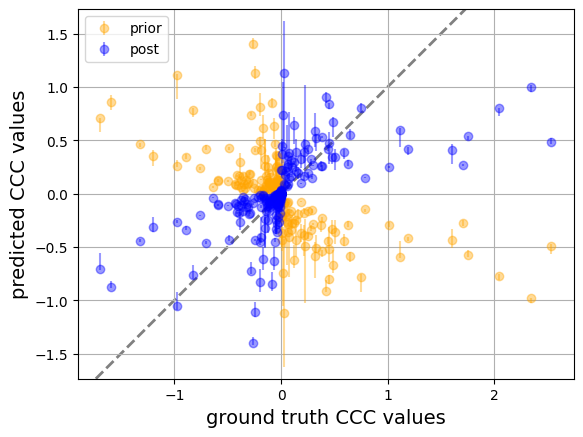

In [32]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC.melt()['value'], priorCCC_ab50_meds['median'], yerr=CCC_errors_ab50_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC.melt()['value'], postCCC_ab50_meds['median'], yerr=CCC_errors_ab50_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=14)
plt.ylabel('predicted CCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_1.svg', format="svg")

## Calculating FCC values and making graphs

In [55]:
gtFCC = pd.DataFrame(r.getScaledFluxControlCoefficientMatrix(), index=r.getReactionIds(), columns=r.getReactionIds())

### priors

In [41]:
Ex05_prior_ab0 = util.get_az_summary(util.run_prior_predictive(BMCA_obj05)['prior']['Ex'])
Ex15_prior_ab0 = util.get_az_summary(util.run_prior_predictive(BMCA_obj15)['prior']['Ex'])
Ex3_prior_ab0 = util.get_az_summary(util.run_prior_predictive(BMCA_obj3)['prior']['Ex'])
Ex5_prior_ab0 = util.get_az_summary(util.run_prior_predictive(BMCA_obj5)['prior']['Ex'])

Ex05_prior_ab25 = Ex05_prior_ab0
Ex15_prior_ab25 = Ex05_prior_ab0
Ex3_prior_ab25 = Ex05_prior_ab0
Ex5_prior_ab25 = Ex05_prior_ab0

Ex05_prior_ab50 = Ex05_prior_ab0
Ex15_prior_ab50 = Ex05_prior_ab0
Ex3_prior_ab50 = Ex05_prior_ab0
Ex5_prior_ab50 = Ex05_prior_ab0

Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


In [42]:
priorFCC05_ab0 = util.estimate_FCCs(BMCA_obj05, Ex05_prior_ab0.reshape((19,13)))
priorFCC15_ab0 = util.estimate_FCCs(BMCA_obj15, Ex15_prior_ab0.reshape((19,13)))
priorFCC3_ab0 = util.estimate_FCCs(BMCA_obj3, Ex3_prior_ab0.reshape((19,13)))
priorFCC5_ab0 = util.estimate_FCCs(BMCA_obj5, Ex5_prior_ab0.reshape((19,13)))

priorFCC05_ab25 = util.estimate_FCCs(BMCA_obj05, Ex05_prior_ab25.reshape((19,13)))
priorFCC15_ab25 = util.estimate_FCCs(BMCA_obj15, Ex15_prior_ab25.reshape((19,13)))
priorFCC3_ab25 = util.estimate_FCCs(BMCA_obj3, Ex3_prior_ab25.reshape((19,13)))
priorFCC5_ab25 = util.estimate_FCCs(BMCA_obj5, Ex5_prior_ab25.reshape((19,13)))

priorFCC05_ab50 = util.estimate_FCCs(BMCA_obj05, Ex05_prior_ab50.reshape((19,13)))
priorFCC15_ab50 = util.estimate_FCCs(BMCA_obj15, Ex15_prior_ab50.reshape((19,13)))
priorFCC3_ab50 = util.estimate_FCCs(BMCA_obj3, Ex3_prior_ab50.reshape((19,13)))
priorFCC5_ab50 = util.estimate_FCCs(BMCA_obj5, Ex5_prior_ab50.reshape((19,13)))

In [43]:
priorFCCs_ab0 = [priorFCC05_ab0, priorFCC15_ab0, priorFCC3_ab0, priorFCC5_ab0]
priorFCCs_ab25 = [priorFCC05_ab25, priorFCC15_ab25, priorFCC3_ab25, priorFCC5_ab25]
priorFCCs_ab50 = [priorFCC05_ab50, priorFCC15_ab50, priorFCC3_ab50, priorFCC5_ab50]

In [45]:
priorFCC_ab0_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()) for priorFCC in priorFCCs_ab0]
priorFCC_ab0_meds = pd.concat([i.melt()['value'] for i in priorFCC_ab0_meds], axis=1).values
priorFCC_ab0_meds = pd.DataFrame(priorFCC_ab0_meds, columns=pt_labels)
priorFCC_ab0_meds['median'] = priorFCC_ab0_meds.median(axis=1)
priorFCC_ab0_meds['min'] = priorFCC_ab0_meds.min(axis=1)
priorFCC_ab0_meds['max'] = priorFCC_ab0_meds.max(axis=1)

priorFCC_ab25_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()) for priorFCC in priorFCCs_ab25]
priorFCC_ab25_meds = pd.concat([i.melt()['value'] for i in priorFCC_ab25_meds], axis=1).values
priorFCC_ab25_meds = pd.DataFrame(priorFCC_ab25_meds, columns=pt_labels)
priorFCC_ab25_meds['median'] = priorFCC_ab25_meds.median(axis=1)
priorFCC_ab25_meds['min'] = priorFCC_ab25_meds.min(axis=1)
priorFCC_ab25_meds['max'] = priorFCC_ab25_meds.max(axis=1)

priorFCC_ab50_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()) for priorFCC in priorFCCs_ab50]
priorFCC_ab50_meds = pd.concat([i.melt()['value'] for i in priorFCC_ab50_meds], axis=1).values
priorFCC_ab50_meds = pd.DataFrame(priorFCC_ab50_meds, columns=pt_labels)
priorFCC_ab50_meds['median'] = priorFCC_ab50_meds.median(axis=1)
priorFCC_ab50_meds['min'] = priorFCC_ab50_meds.min(axis=1)
priorFCC_ab50_meds['max'] = priorFCC_ab50_meds.max(axis=1)


In [46]:
FCC_lower_y_ab0_prior = np.array(priorFCC_ab0_meds['median']) - np.array(priorFCC_ab0_meds['min'])
FCC_upper_y_ab0_prior = np.array(priorFCC_ab0_meds['max']) - np.array(priorFCC_ab0_meds['median'])
FCC_errors_ab0_prior = [FCC_lower_y_ab0_prior, FCC_upper_y_ab0_prior]

FCC_lower_y_ab25_prior = np.array(priorFCC_ab25_meds['median']) - np.array(priorFCC_ab25_meds['min'])
FCC_upper_y_ab25_prior = np.array(priorFCC_ab25_meds['max']) - np.array(priorFCC_ab25_meds['median'])
FCC_errors_ab25_prior = [FCC_lower_y_ab25_prior, FCC_upper_y_ab25_prior]

FCC_lower_y_ab50_prior = np.array(priorFCC_ab50_meds['median']) - np.array(priorFCC_ab50_meds['min'])
FCC_upper_y_ab50_prior = np.array(priorFCC_ab50_meds['max']) - np.array(priorFCC_ab50_meds['median'])
FCC_errors_ab50_prior = [FCC_lower_y_ab50_prior, FCC_upper_y_ab50_prior]

### posteriors

In [47]:
postFCC05_ab0 = util.estimate_FCCs(BMCA_obj05, Ex05_ab0.reshape((19,13)))
postFCC15_ab0 = util.estimate_FCCs(BMCA_obj15, Ex15_ab0.reshape((19,13)))
postFCC3_ab0 = util.estimate_FCCs(BMCA_obj3, Ex3_ab0.reshape((19,13)))
postFCC5_ab0 = util.estimate_FCCs(BMCA_obj5, Ex5_ab0.reshape((19,13)))

postFCC05_ab25 = util.estimate_FCCs(BMCA_obj05, Ex05_ab25.reshape((19,13)))
postFCC15_ab25 = util.estimate_FCCs(BMCA_obj15, Ex15_ab25.reshape((19,13)))
postFCC3_ab25 = util.estimate_FCCs(BMCA_obj3, Ex3_ab25.reshape((19,13)))
postFCC5_ab25 = util.estimate_FCCs(BMCA_obj5, Ex5_ab25.reshape((19,13)))

postFCC05_ab50 = util.estimate_FCCs(BMCA_obj05, Ex05_ab50.reshape((19,13)))
postFCC15_ab50 = util.estimate_FCCs(BMCA_obj15, Ex15_ab50.reshape((19,13)))
postFCC3_ab50 = util.estimate_FCCs(BMCA_obj3, Ex3_ab50.reshape((19,13)))
postFCC5_ab50 = util.estimate_FCCs(BMCA_obj5, Ex5_ab50.reshape((19,13)))


In [48]:
postFCCs_ab0 = [postFCC05_ab0, postFCC15_ab0, postFCC3_ab0, postFCC5_ab0]
postFCCs_ab25 = [postFCC05_ab25, postFCC15_ab25, postFCC3_ab25, postFCC5_ab25]
postFCCs_ab50 = [postFCC05_ab50, postFCC15_ab50, postFCC3_ab50, postFCC5_ab50]

In [51]:
postFCC_ab0_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()) for postFCC in postFCCs_ab0]
postFCC_ab0_meds = pd.concat([i.melt()['value'] for i in postFCC_ab0_meds], axis=1).values
postFCC_ab0_meds = pd.DataFrame(postFCC_ab0_meds, columns=pt_labels)
postFCC_ab0_meds['median'] = postFCC_ab0_meds.median(axis=1)
postFCC_ab0_meds['min'] = postFCC_ab0_meds.min(axis=1)
postFCC_ab0_meds['max'] = postFCC_ab0_meds.max(axis=1)

postFCC_ab25_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()) for postFCC in postFCCs_ab25]
postFCC_ab25_meds = pd.concat([i.melt()['value'] for i in postFCC_ab25_meds], axis=1).values
postFCC_ab25_meds = pd.DataFrame(postFCC_ab25_meds, columns=pt_labels)
postFCC_ab25_meds['median'] = postFCC_ab25_meds.median(axis=1)
postFCC_ab25_meds['min'] = postFCC_ab25_meds.min(axis=1)
postFCC_ab25_meds['max'] = postFCC_ab25_meds.max(axis=1)

postFCC_ab50_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()) for postFCC in postFCCs_ab50]
postFCC_ab50_meds = pd.concat([i.melt()['value'] for i in postFCC_ab50_meds], axis=1).values
postFCC_ab50_meds = pd.DataFrame(postFCC_ab50_meds, columns=pt_labels)
postFCC_ab50_meds['median'] = postFCC_ab50_meds.median(axis=1)
postFCC_ab50_meds['min'] = postFCC_ab50_meds.min(axis=1)
postFCC_ab50_meds['max'] = postFCC_ab50_meds.max(axis=1)
# postFCC_ab50_meds


In [52]:
FCC_lower_y_ab0_post = np.array(postFCC_ab0_meds['median']) - np.array(postFCC_ab0_meds['min'])
FCC_upper_y_ab0_post = np.array(postFCC_ab0_meds['max']) - np.array(postFCC_ab0_meds['median'])
FCC_errors_ab0_post = [FCC_lower_y_ab0_post, FCC_upper_y_ab0_post]

FCC_lower_y_ab25_post = np.array(postFCC_ab25_meds['median']) - np.array(postFCC_ab25_meds['min'])
FCC_upper_y_ab25_post = np.array(postFCC_ab25_meds['max']) - np.array(postFCC_ab25_meds['median'])
FCC_errors_ab25_post = [FCC_lower_y_ab25_post, FCC_upper_y_ab25_post]

FCC_lower_y_ab50_post = np.array(postFCC_ab50_meds['median']) - np.array(postFCC_ab50_meds['min'])
FCC_upper_y_ab50_post = np.array(postFCC_ab50_meds['max']) - np.array(postFCC_ab50_meds['median'])
FCC_errors_ab50_post = [FCC_lower_y_ab50_post, FCC_upper_y_ab50_post]

### graphs

Text(0, 0.5, 'predicted FCC values')

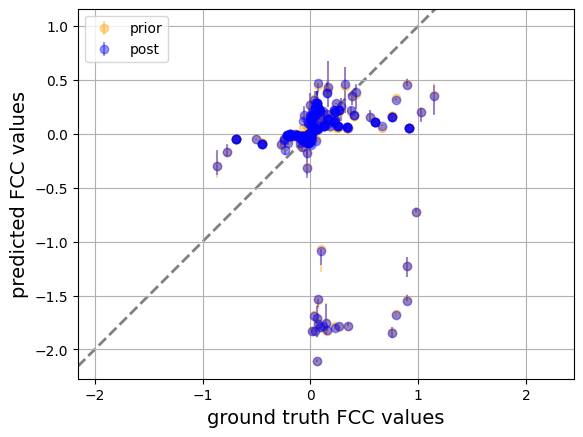

In [56]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC.melt()['value'], priorFCC_ab0_meds['median'], yerr=FCC_errors_ab0_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC.melt()['value'], postFCC_ab0_meds['median'], yerr=FCC_errors_ab0_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_1.svg', format="svg")

### adding corrections for where the enzyme perturbed is directly involved in the reaction

In [53]:
rxn = np.repeat(r.getReactionIds(),len(r.getReactionIds()))
enz_pt = r.getReactionIds() * len(r.getReactionIds())
FCC_idx = pd.DataFrame([rxn, enz_pt]).T

In [57]:
pt_enz_is_rxn = np.linspace(0,len(rxn)-1,len(r.getReactionIds()))
pt_enz_is_rxn

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320., 340., 360.])

### graphing the corrected FCC dfs

In [58]:
priorFCC_ab0_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_ab0_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_ab25_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_ab25_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_ab50_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_ab50_meds.loc[pt_enz_is_rxn, 'median'] += 2

Text(0, 0.5, 'predicted FCC values')

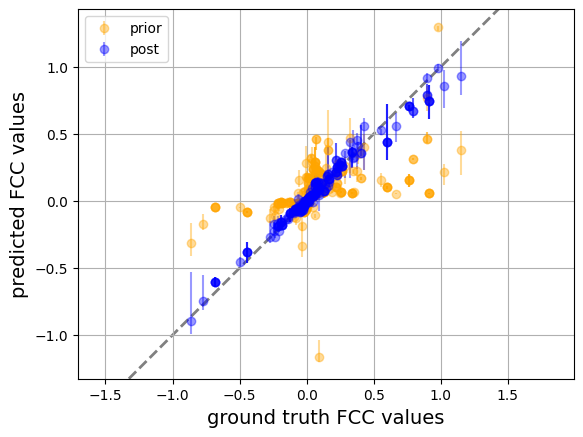

In [59]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC.melt()['value'], priorFCC_ab0_meds['median'], yerr=FCC_errors_ab0_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC.melt()['value'], postFCC_ab0_meds['median'], yerr=FCC_errors_ab0_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_ab0_wCorrection.svg', format="svg")

Text(0, 0.5, 'predicted FCC values')

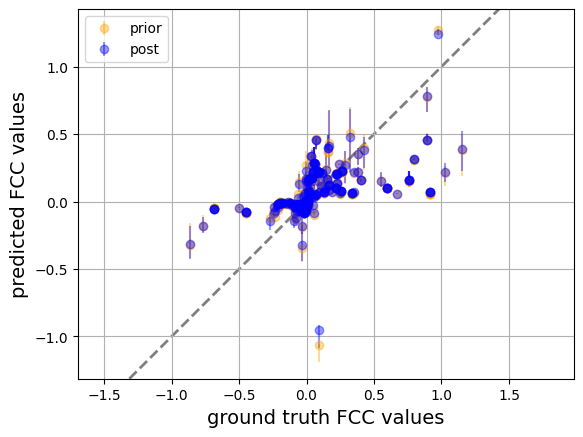

In [60]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC.melt()['value'], priorFCC_ab25_meds['median'], yerr=FCC_errors_ab25_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC.melt()['value'], postFCC_ab25_meds['median'], yerr=FCC_errors_ab25_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_ab25_wCorrection.svg', format="svg")

Text(0, 0.5, 'predicted FCC values')

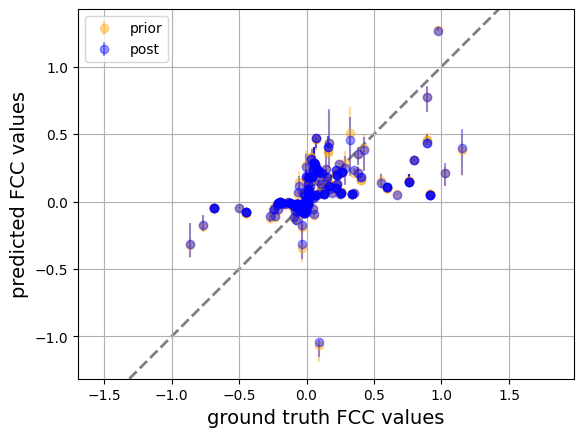

In [61]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC.melt()['value'], priorFCC_ab50_meds['median'], yerr=FCC_errors_ab50_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC.melt()['value'], postFCC_ab50_meds['median'], yerr=FCC_errors_ab50_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left")
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('predicted FCC values', size=14)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_ab50_wCorrection.svg', format="svg")

### Graphing the absolute error

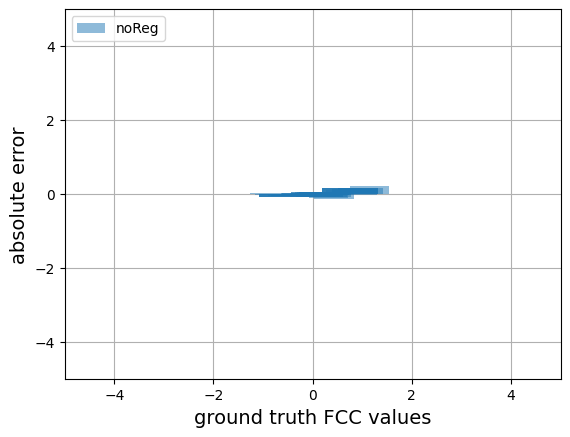

In [62]:
# FCCs need to be corrected before running this cell

plt.grid()
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.bar(gtFCC.melt()['value'], gtFCC.melt()['value']-postFCC_ab0_meds['median'], alpha=0.5, label='noReg', zorder=200)

plt.xlabel('ground truth FCC values', size=14)
plt.ylabel('absolute error', size=14)

plt.legend(loc="upper left")
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-absError_byAllostery.svg', format="svg")

## Evaluating FCC ranking

In [63]:
def calculate_FCC_med_ranking_df(postFCC,  r):
    postFCC_med=pd.DataFrame(np.median(postFCC, axis=0), columns=r.getReactionIds(), index=r.getReactionIds()).abs()
    m1 = postFCC_med.index.values[:, None] == postFCC_med.columns.values
    postFCC = pd.DataFrame(np.select([m1], [float('Nan')], postFCC_med), columns=postFCC_med.columns, index=postFCC_med.index)
    postFCC_rankings= postFCC.rank(axis=1, ascending=False, na_option='keep')

    return postFCC_rankings


### heatmap of how far FCC rank predictions are from ground truth FCC ranks.

In [66]:
gt_ab0_FCC=pd.DataFrame(r.getScaledFluxControlCoefficientMatrix(), columns=r.getReactionIds(), index=r.getReactionIds()).abs()
m1 = gt_ab0_FCC.index.values[:, None] == gt_ab0_FCC.columns.values
gt_ab0_FCC = pd.DataFrame(np.select([m1], [float('Nan')], gt_ab0_FCC), columns=gt_ab0_FCC.columns, index=gt_ab0_FCC.index)
gtFCC_ab0_rankings= gt_ab0_FCC.rank(axis=1, ascending=False, na_option='keep')
# fruit
a = gtFCC_ab0_rankings.loc['v19']

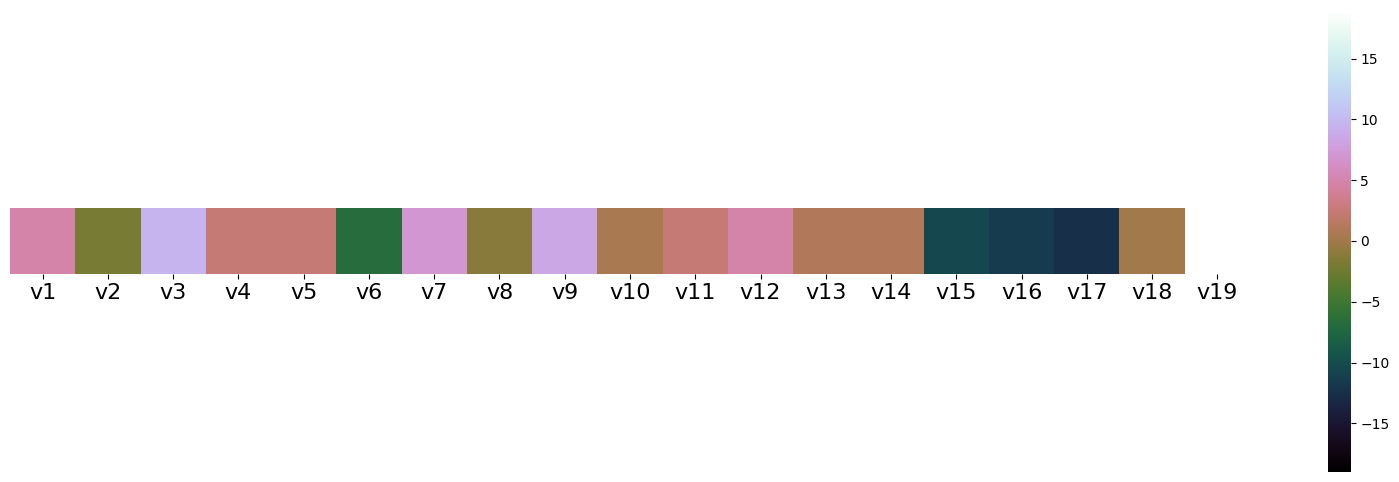

In [67]:
ranking_dfs = []
for i in postFCCs_1: 
    ranking_dfs.append(calculate_FCC_med_ranking_df(i, r))

df_concat = pd.concat(ranking_dfs)
by_row_index = df_concat.groupby(df_concat.index, sort=False)
post_df_means = by_row_index.mean()

delta_df_means = post_df_means-gtFCC_ab0_rankings

# what are the labels? are they the ground truth rankings? 
plt.figure(figsize=(20, 6))
# sns.heatmap(pd.DataFrame(delta_df_means.loc['v_ACE_OUT']).T, square=True, cmap='coolwarm', vmin=-60, vmax=60)
sns.heatmap(pd.DataFrame(delta_df_means.loc['v19']).T, square=True, cmap='cubehelix', vmin=-19, vmax=19)
_ = plt.yticks(ticks=[], labels=[])
_ = plt.xticks(size=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities_zoom.svg', format="svg")

## Quantifying the number of FCCs in top ten that were predicted correctly by BMCA


In [47]:
rank_counts_df = pd.read_csv('../data/results/TopologyB_top10.csv')
rank_counts_df

In [ ]:
stagbar_counts = rank_counts_df.pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])
stagbar_counts

In [ ]:
ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend()
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}_rankCounts.svg', format='svg')

## Visualizing Spearman data 

### Condense Spearman data

In [125]:
os.chdir(f'../data/results/spearman_coefficients/topology{topology}/')

In [ ]:
spr_file_list = [i for i in os.listdir()]

spr_dfs = []
for file in spr_file_list:
    a = pd.read_csv(file)

    reg = file.split('-')[1].split('_')[0]
    omit = file.split('_')[1]

    a['reg'] = [reg]*len(a)
    a['omit'] = [omit]*len(a)
    spr_dfs.append(a)

all_spr_df_B = pd.concat(spr_dfs)
all_spr_df_B

In [127]:
os.chdir('../../../../notebooks/')

In [128]:
all_spr_df_B.rename(columns={'Unnamed: 0':'perturbation'}, inplace=True)
all_spr_df_B['distr'] = [(i.split('-')[1]) for i in all_spr_df_B['perturbation']]
all_spr_df_B['perturbation'] = [float(i.split('x')[0]) for i in all_spr_df_B['perturbation']]

In [ ]:
all_spr_df_B = all_spr_df_B[all_spr_df_B['perturbation'] != 1.01]
all_spr_df_B

In [ ]:
a = pd.pivot_table(all_spr_df_B, values=['r'], index=['omit', 'distr'], aggfunc=['mean', 'std'], sort=False)
a.reset_index(inplace=True)
a = a.reindex([0,1,6,7,2,3,8,9,4,5])
a

### Graph of aggregated Spearman corr

In [ ]:
# plot
ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], a[a['distr']=='prior']['mean'].squeeze(), width=0.2, color='tab:blue', align='center', zorder=100, label='prior')
ax.bar([i+0.1 for i in range(5)], a[a['distr']=='post']['mean'].squeeze(), width=0.2, color='tab:orange', align='center', zorder=100, label='posterior')

## add error bars
plt.errorbar([i-0.1 for i in range(5)], a[a['distr']=='prior']['mean'].squeeze(), 
             yerr=a[a['distr']=='prior']['std'].squeeze(), 
             color='black', capsize=3, zorder=1000, ls='none')

plt.errorbar([i+0.1 for i in range(5)], a[a['distr']=='post']['mean'].squeeze(), 
             yerr=a[a['distr']=='post']['std'].squeeze(), 
             color='black', capsize=3, zorder=1000, ls='none')

ax.set_xticks([-0.5]+list(np.arange(0,5)))
_ = ax.set_xticklabels(['', 'All Data', "Fluxes", 'Enzymes', "Int. Met.", "Ex. Met."], size=14) ## fix the labels
_ = ax.set_yticks(np.arange(0,1,0.05))

ax.legend()#plt.ylabel('Spearman correlation coefficient ($r$)', size=14)

# plt.savefig(f'../data/results/raw_svg_figures/Top{topology}_sprCorr.svg', format='svg' )